<a href="https://colab.research.google.com/github/Aparnakhaleanwar/Capstone1_EDA/blob/main/CapStone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline

In [9]:
df = pd.read_csv("/content/Hotel_Bookings_2.csv")

print(df.to_string()) 

            hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies meal country market_segment distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled reserved_room_type assigned_room_type  booking_changes deposit_type  agent  company  days_in_waiting_list    customer_type     adr  required_car_parking_spaces  total_of_special_requests reservation_status reservation_status_date
0    Resort Hotel            0        342               2015               July                        27                          1                        0                     0       2         0       0   BB     PRT         Direct               Direct                  0                       0                               0                  C                  C                3   No Deposit    NaN      NaN                     0     

In [5]:
#verify data types of all columns
df.dtypes


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

***Agent wise bookings Analysis***

In [6]:
#for Agent Analysis, replaced NaN values by 0 to perform further investigation.
df['agent'] = df['agent'].fillna(0)
df['agent']=df['agent'].astype(int)
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

    Agent  Agent_wise_bookings
38  306.0                    1
3   305.0                   20
31  304.0                    1
40  303.0                    1
30  300.0                    1


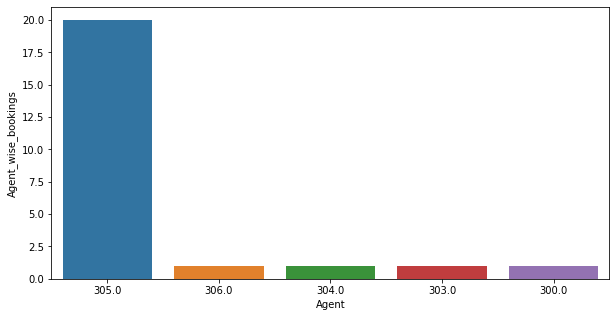

In [27]:
#Remove company data where company is not associated with hotel
df.drop(df[(df['agent'] == 0)].index, inplace=True)
#Find count of each agent to predict which agent has given maximum business which can be considered while providing commission to agent.
df_Agent = df['agent'].value_counts().reset_index().rename(columns = {'index':'Agent','agent':'Agent_wise_bookings'}).sort_values(by = 'Agent_wise_bookings', ascending = False)
df_Agent = df_Agent.nlargest(5, ['Agent']) # Find top 5 agents providing maximum business.
plt.figure(figsize = (10,5))
print (df_Agent)
sns.barplot(x = 'Agent', y = 'Agent_wise_bookings', data = df_Agent, order = df_Agent.sort_values('Agent_wise_bookings', ascending = False).Agent)

***Company wise bookings Analysis***

In [43]:
#Company Analysis
df['company'] = df['company'].fillna(0)
df['company']=df['company'].astype(int)
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [44]:

#Find Unique companies

df['company'].unique()

array([  0, 110, 113, 270, 178, 240, 154])

   Company  Company_Owned_Hotels
0    110.0                     4
1    178.0                     2
2    113.0                     1
3    270.0                     1
4    240.0                     1


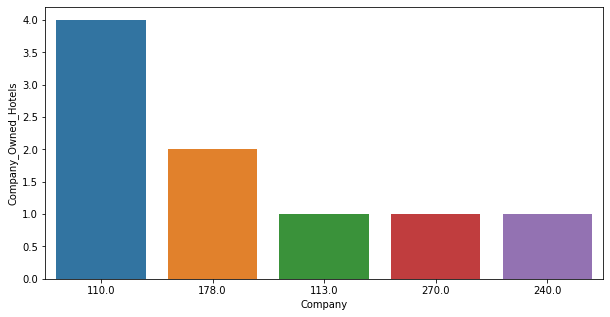

In [35]:
#Remove company data where company is not associated with hotel
df.drop(df[(df['company'] == 0)].index, inplace=True)
#Find company wise hotel count. so if we considered it's a chain of hotel associated with any company then this data will 
#show which company hotels are preferable.
df['company'].value_counts()
#Find count of each company to predict which company is getting maximum business.
df_Company = df['company'].value_counts().reset_index().rename(columns = {'index':'Company','company':'Company_Owned_Hotels'}).sort_values(by = 'Company_Owned_Hotels', ascending = False)
df_Company = df_Company.nlargest(5, ['Company_Owned_Hotels']) # Find top 5 agents providing maximum business.
plt.figure(figsize = (10,5))
print (df_Company)
sns.barplot(x = 'Company', y = 'Company_Owned_Hotels', data = df_Company, order = df_Company.sort_values('Company_Owned_Hotels', ascending = False).Company)

**Market Segment -Booking Analysis**


   MarketSegment  MarketSegment_Wise_Count
0      Online TA                       417
1  Offline TA/TO                       163
2         Direct                       138
3         Groups                        20
4      Corporate                        10
5  Complementary                         1


<Figure size 720x360 with 0 Axes>

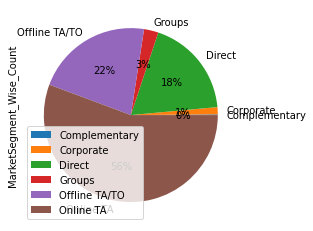

In [40]:
#Find count of each market segment to predict which segment is popular.
df_Market_Segment = df['market_segment'].value_counts().reset_index().rename(columns = {'index':'MarketSegment','market_segment':'MarketSegment_Wise_Count'}).sort_values(by = 'MarketSegment_Wise_Count', ascending = False)
plt.figure(figsize = (10,5))
print (df_Market_Segment)
#sns.barplot(x = 'MarketSegment', y = 'MarketSegment_Wise_Count', data = df_Market_Segment, order = df_Market_Segment.sort_values('MarketSegment_Wise_Count', ascending = False).MarketSegment)
df_Market_Segment.groupby(['MarketSegment']).sum().plot(kind='pie',y='MarketSegment_Wise_Count',autopct='%1.0f%%')

***Distributor channel analysis***

Q1)What is booking % against each distribution channel.

  DistributionChannel  Distribution_Channel_Wise_Count
0               TA/TO                              584
1              Direct                              155
2           Corporate                               10


<Figure size 720x360 with 0 Axes>

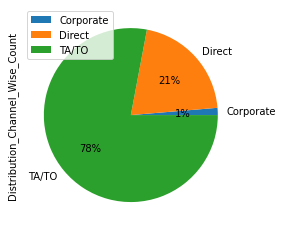

In [43]:
#Find count of each distribution channel to predict which distribution channel is used by maximum customer for hotel booking .
df_Distribution_Channel = df['distribution_channel'].value_counts().reset_index().rename(columns = {'index':'DistributionChannel','distribution_channel':'Distribution_Channel_Wise_Count'}).sort_values(by = 'Distribution_Channel_Wise_Count', ascending = False)
plt.figure(figsize = (10,5))
print (df_Distribution_Channel)
df_Distribution_Channel.groupby(['DistributionChannel']).sum().plot(kind='pie',y='Distribution_Channel_Wise_Count',autopct='%1.0f%%')

Q2)Which distribution channel is giving more business to hotels on basis of hotel type?

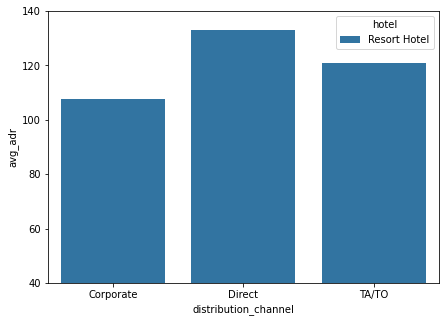

In [46]:
dc_hotel = df.groupby(['distribution_channel', 'hotel'])
df_dc_hotel = pd.DataFrame(round((dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = df_dc_hotel['distribution_channel'], y = df_dc_hotel['avg_adr'], hue = df_dc_hotel['hotel'])
plt.ylim(40,140)
plt.show()

***deposit vs cancellation***

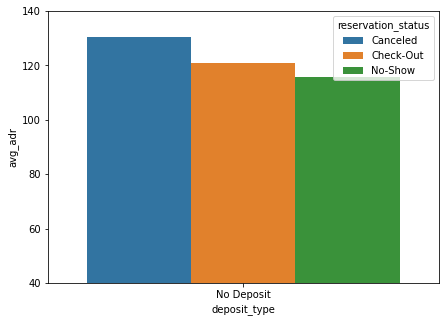

In [49]:
dt_rs = df.groupby(['deposit_type', 'reservation_status'])
df_dt_rs = pd.DataFrame(round((dt_rs['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = df_dt_rs['deposit_type'], y = df_dt_rs['avg_adr'], hue = df_dt_rs['reservation_status'])
plt.ylim(40,140)
plt.show()

***Cancellation reasons on basis of days_in_waiting_list/required_car_parking_spaces/total_of_special_requests***

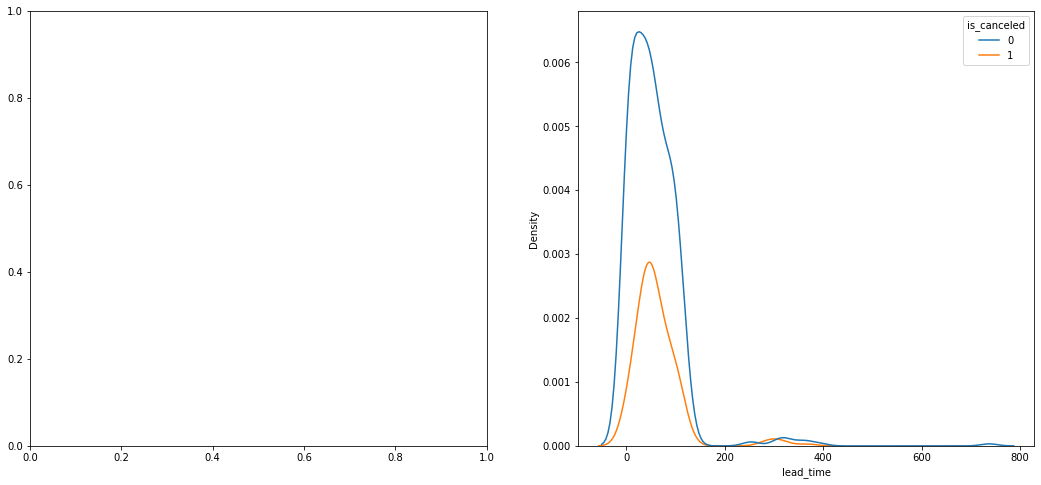

In [59]:
waiting_bookings = df[df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax=axes[1],x = df['lead_time'], hue = df['is_canceled'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


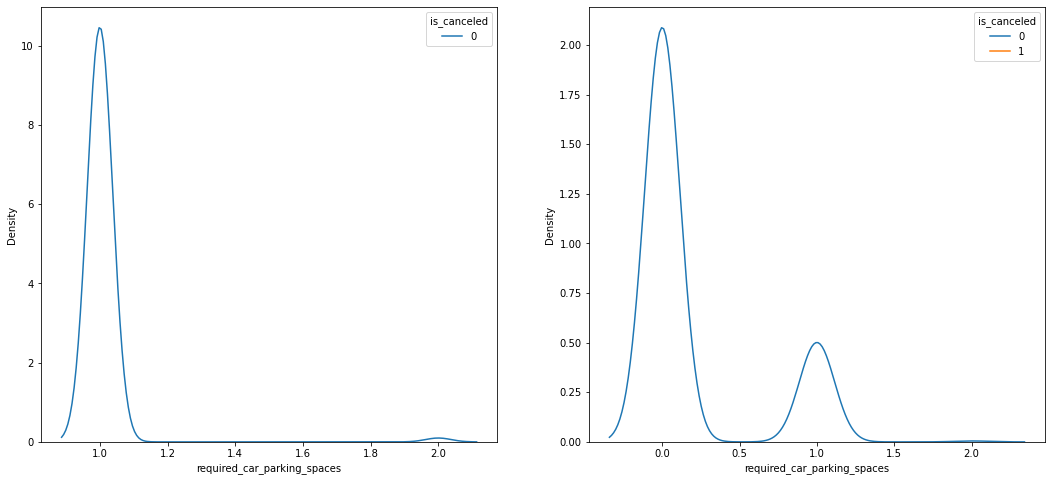

In [61]:
Req_CarParking = df[df['required_car_parking_spaces'] !=0]  # Selecting bookings with non zero waiting time

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'required_car_parking_spaces', hue = 'is_canceled' , data = Req_CarParking)
sns.kdeplot(ax=axes[1],x = df['required_car_parking_spaces'], hue = df['is_canceled'])
plt.show()

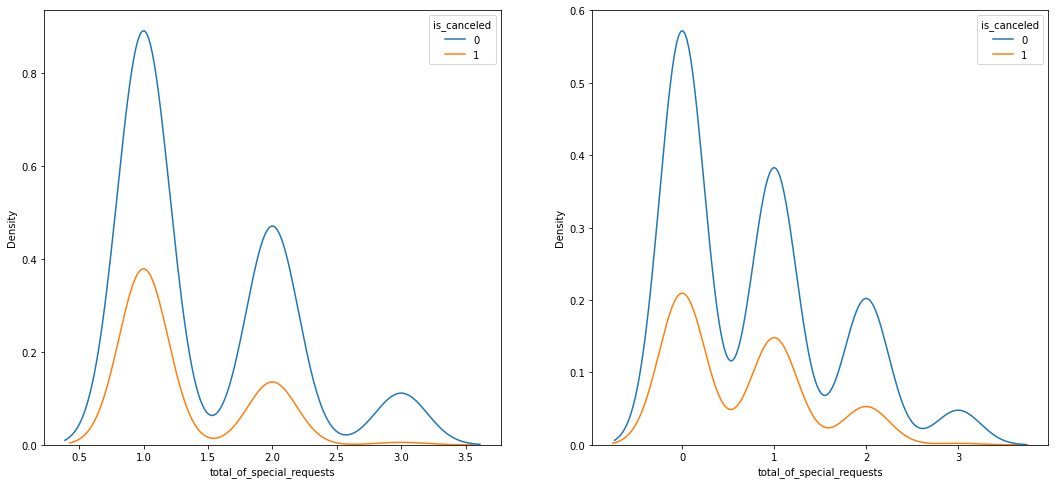

In [63]:
SpecialRequests = df[df['total_of_special_requests'] !=0]  # Selecting bookings with non zero waiting time

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'total_of_special_requests', hue = 'is_canceled' , data = SpecialRequests)
sns.kdeplot(ax=axes[1],x = df['total_of_special_requests'], hue = df['is_canceled'])
plt.show()